In [1]:
# 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
chunk = pd.read_csv('/content/drive/MyDrive/log_data.csv', chunksize = 1000)
chunk = list(chunk)

In [4]:
log = pd.concat(chunk)
log

,user_id,event,timestamp,mp_os,mp_app_version,date_cd
0,576409,StartLoanApply,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
1,576409,ViewLoanApplyIntro,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
2,72878,EndLoanApply,2022-03-25 11:14:44,Android,3.8.4,2022-03-25
3,645317,OpenApp,2022-03-25 11:15:09,iOS,3.6.1,2022-03-25
4,645317,UseLoanManage,2022-03-25 11:15:11,iOS,3.6.1,2022-03-25
...,...,...,...,...,...,...
17843988,242442,StartLoanApply,2022-05-27 16:08:21,Android,3.13.0,2022-05-27
17843989,242442,EndLoanApply,2022-05-27 16:08:21,Android,3.13.0,2022-05-27
17843990,593062,OpenApp,2022-05-27 16:19:10,Android,3.13.0,2022-05-27
17843991,593062,Login,2022-05-27 16:19:15,Android,3.13.0,2022-05-27


In [5]:
log.isnull().sum()

user_id                0
event                  0
timestamp              0
mp_os                980
mp_app_version    660597
date_cd                0
dtype: int64

In [6]:
log1 = log.copy()

1. event행동명 데이터 수치화

In [7]:
# event 행동명 데이터 수치화 
# 원핫 인코딩 

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np

log = pd.DataFrame.copy(log1)
def dummy_data(data,columns):
    for column in columns:
        data = pd.concat([data,pd.get_dummies(data[column],prefix = column)], axis=1)
        data = data.drop(column, axis=1)
    return data

dummy_columns = ['event']
log2 = dummy_data(log1, dummy_columns)
log2

,user_id,timestamp,mp_os,mp_app_version,date_cd,event_CompleteIDCertification,event_EndLoanApply,event_GetCreditInfo,event_Login,event_OpenApp,event_SignUp,event_StartLoanApply,event_UseDSRCalc,event_UseLoanManage,event_UsePrepayCalc,event_ViewLoanApplyIntro
0,576409,2022-03-25 11:12:09,Android,3.8.2,2022-03-25,0,0,0,0,0,0,1,0,0,0,0
1,576409,2022-03-25 11:12:09,Android,3.8.2,2022-03-25,0,0,0,0,0,0,0,0,0,0,1
2,72878,2022-03-25 11:14:44,Android,3.8.4,2022-03-25,0,1,0,0,0,0,0,0,0,0,0
3,645317,2022-03-25 11:15:09,iOS,3.6.1,2022-03-25,0,0,0,0,1,0,0,0,0,0,0
4,645317,2022-03-25 11:15:11,iOS,3.6.1,2022-03-25,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17843988,242442,2022-05-27 16:08:21,Android,3.13.0,2022-05-27,0,0,0,0,0,0,1,0,0,0,0
17843989,242442,2022-05-27 16:08:21,Android,3.13.0,2022-05-27,0,1,0,0,0,0,0,0,0,0,0
17843990,593062,2022-05-27 16:19:10,Android,3.13.0,2022-05-27,0,0,0,0,1,0,0,0,0,0,0
17843991,593062,2022-05-27 16:19:15,Android,3.13.0,2022-05-27,0,0,0,1,0,0,0,0,0,0,0


In [8]:
# id 별로 event_변수의 합 구하기
log3 = log2.groupby('user_id').sum()

In [9]:
log3.sum()

event_CompleteIDCertification    1237777.0
event_EndLoanApply               2715253.0
event_GetCreditInfo              2661997.0
event_Login                      2463755.0
event_OpenApp                    3460762.0
event_SignUp                       34892.0
event_StartLoanApply             1893914.0
event_UseDSRCalc                    4665.0
event_UseLoanManage              1558906.0
event_UsePrepayCalc                 7360.0
event_ViewLoanApplyIntro         1804712.0
dtype: float64

In [10]:
log3

,event_CompleteIDCertification,event_EndLoanApply,event_GetCreditInfo,event_Login,event_OpenApp,event_SignUp,event_StartLoanApply,event_UseDSRCalc,event_UseLoanManage,event_UsePrepayCalc,event_ViewLoanApplyIntro
user_id,,,,,,,,,,,
1,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,4.0,7.0,8.0,0.0,5.0,0.0,4.0,0.0,9.0,1.0,5.0
12,15.0,39.0,5.0,15.0,15.0,0.0,15.0,0.0,1.0,0.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...
879693,6.0,12.0,2.0,0.0,9.0,0.0,17.0,0.0,5.0,0.0,10.0
879694,1.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
879695,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


2. 변환방법 : 로그변환

In [11]:
log4 = log3.apply(lambda x: np.log(x+1)) 
log5 = log4.apply(lambda x: np.log(x+1))

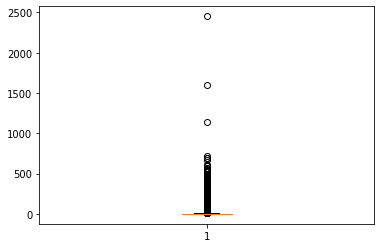

In [12]:
# box-plot log3 : 기존 변수
plt.boxplot(log3['event_EndLoanApply'])
plt.show()

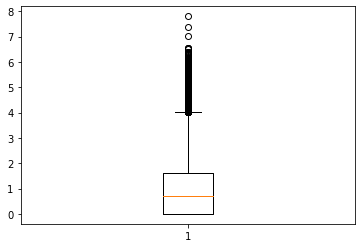

In [13]:
# box-plot log4 : log 변환 변수
plt.boxplot(log4['event_EndLoanApply'])
plt.show()

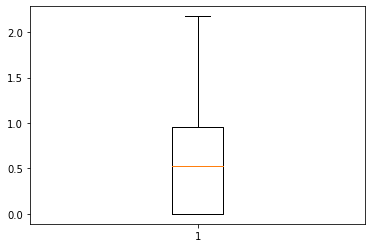

In [14]:
# box-plot log5 : log-log 변환 변수
plt.boxplot(log5['event_EndLoanApply'])
plt.show()


In [15]:
log6= log5.copy()

3. 변수 선택 방법 : 상관관계 확인 후 변수제거 및 선택

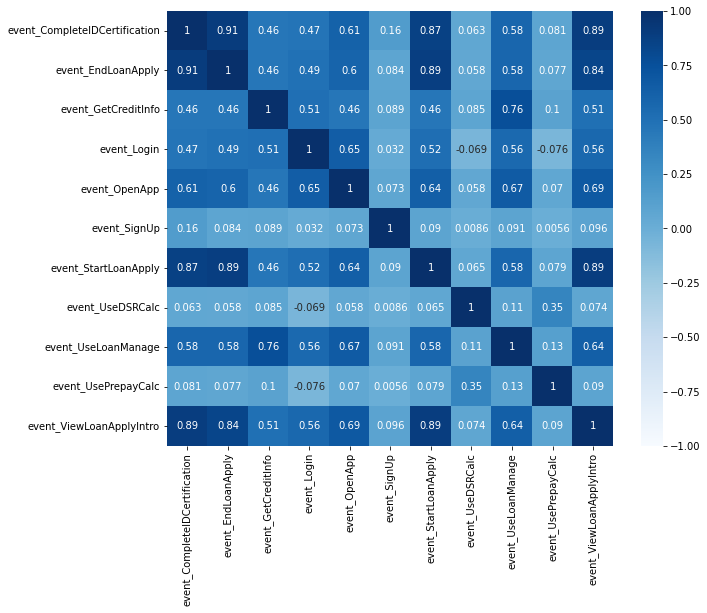

In [16]:
# heatmap 이용
import seaborn as sb
plt.rcParams["figure.figsize"] = (10,8)
sb.heatmap(log6.corr(),
           annot = True, 
           cmap = 'Blues', 
           vmin = -1, vmax=1 , 
          )

In [17]:
# 변수 제거 및 선택
# 상관성이 높은 loan(한도조회) 관련 데이터-> event_EndLoanApply 하나로 선택
# 문제 자체가 핀다 홈화면 진입 고객의 고객 군집 분석 -> 로그인, 회원가입, 앱오픈 제거
# 'event_EndLoanApply', 'event_UseDSRCalc', 'event_UsePrepayCalc', 'event_UseLoanManage', 'event_GetCreditInfo' -> 5개 변수
log7 = log6.filter(['event_EndLoanApply', 'event_UseDSRCalc', 'event_UsePrepayCalc', 'event_UseLoanManage', 'event_GetCreditInfo'])
log7




,event_EndLoanApply,event_UseDSRCalc,event_UsePrepayCalc,event_UseLoanManage,event_GetCreditInfo
user_id,,,,,
1,0.000000,0.0,0.000000,0.526589,0.869742
7,0.000000,0.0,0.000000,0.000000,0.526589
9,0.000000,0.0,0.000000,0.000000,0.869742
11,1.124748,0.0,0.526589,1.194706,1.162283
12,1.545194,0.0,0.000000,0.526589,1.026672
...,...,...,...,...,...
879693,1.271150,0.0,0.000000,1.026672,0.741276
879694,0.869742,0.0,0.000000,0.000000,0.000000
879695,0.526589,0.0,0.000000,0.000000,0.000000


4. 적절한 군집 수 찾기

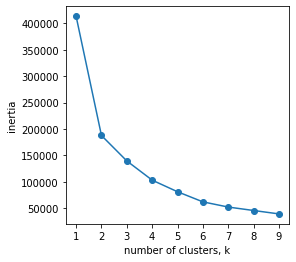

In [18]:
# 적절한 군집수 찾기
from sklearn.cluster import KMeans

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(log7)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

5. K-means 모델

In [19]:
# k-means 군집
kmeans = KMeans(n_clusters = 4, random_state=0)
clusters = kmeans.fit(log7)

log7['cluster'] = clusters.labels_
log7.head()

,event_EndLoanApply,event_UseDSRCalc,event_UsePrepayCalc,event_UseLoanManage,event_GetCreditInfo,cluster
user_id,,,,,,
1,0.000000,0.0,0.000000,0.526589,0.869742,2
7,0.000000,0.0,0.000000,0.000000,0.526589,0
9,0.000000,0.0,0.000000,0.000000,0.869742,0
11,1.124748,0.0,0.526589,1.194706,1.162283,1
12,1.545194,0.0,0.000000,0.526589,1.026672,1


In [20]:
log7.groupby('cluster').count()

,event_EndLoanApply,event_UseDSRCalc,event_UsePrepayCalc,event_UseLoanManage,event_GetCreditInfo
cluster,,,,,
0,200079,200079,200079,200079,200079
1,167416,167416,167416,167416,167416
2,101921,101921,101921,101921,101921
3,115220,115220,115220,115220,115220


In [21]:
# 클러스터링 결과 시각화
# PCA 차원 축소를 이용하여 2차원으로 나타내기
from sklearn.decomposition import PCA
X = log7.copy()

# 객체
pca = PCA(n_components=2)

# 적용
pca.fit(X)
x_pca = pca.transform(X)
x_pca

array([[ 0.65532871, -0.28568876],
       [-1.35175469, -0.35524039],
       [-1.33709754, -0.16908746],
       ...,
       [ 1.64736557, -0.99967029],
       [ 0.79536308,  0.13162035],
       [-1.37424699, -0.6409036 ]])

In [22]:
pca_df = pd.DataFrame(x_pca)
log7 = log7.reset_index()
pca_df['cluster'] = log7['cluster']
pca_df.head()

,0,1,cluster
0,0.655329,-0.285689,2
1,-1.351755,-0.355240,0
2,-1.337098,-0.169087,0
3,0.021587,1.110897,1
4,0.037650,0.862841,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


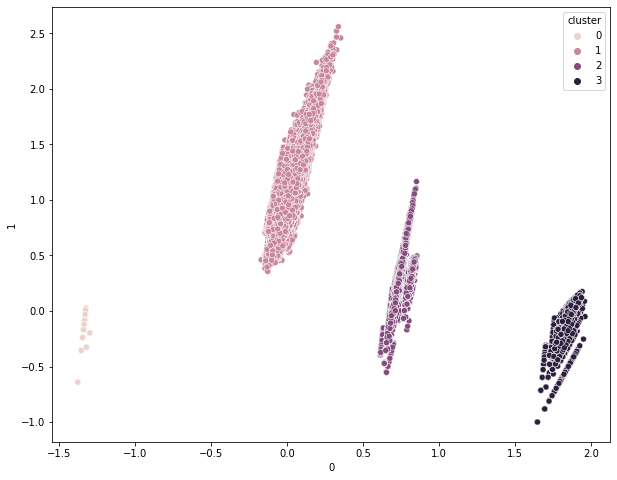

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
axs = plt.subplots()
axs = sns.scatterplot(0, 1, hue = 'cluster', data = pca_df)

6. 군집별 특성 비교

In [24]:
log7.groupby('cluster').count()

,user_id,event_EndLoanApply,event_UseDSRCalc,event_UsePrepayCalc,event_UseLoanManage,event_GetCreditInfo
cluster,,,,,,
0,200079,200079,200079,200079,200079,200079
1,167416,167416,167416,167416,167416,167416
2,101921,101921,101921,101921,101921,101921
3,115220,115220,115220,115220,115220,115220


In [25]:
log_result = log3.filter(['event_EndLoanApply', 'event_UseDSRCalc', 'event_UsePrepayCalc', 'event_UseLoanManage', 'event_GetCreditInfo'])
log_result

,event_EndLoanApply,event_UseDSRCalc,event_UsePrepayCalc,event_UseLoanManage,event_GetCreditInfo
user_id,,,,,
1,0.0,0.0,0.0,1.0,3.0
7,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,3.0
11,7.0,0.0,1.0,9.0,8.0
12,39.0,0.0,0.0,1.0,5.0
...,...,...,...,...,...
879693,12.0,0.0,0.0,5.0,2.0
879694,3.0,0.0,0.0,0.0,0.0
879695,1.0,0.0,0.0,0.0,0.0


In [26]:
log_result = log_result.reset_index()
log_result['cluster'] = log7['cluster']
log_result

,user_id,event_EndLoanApply,event_UseDSRCalc,event_UsePrepayCalc,event_UseLoanManage,event_GetCreditInfo,cluster
0,1,0.0,0.0,0.0,1.0,3.0,2
1,7,0.0,0.0,0.0,0.0,1.0,0
2,9,0.0,0.0,0.0,0.0,3.0,0
3,11,7.0,0.0,1.0,9.0,8.0,1
4,12,39.0,0.0,0.0,1.0,5.0,1
...,...,...,...,...,...,...,...
584631,879693,12.0,0.0,0.0,5.0,2.0,1
584632,879694,3.0,0.0,0.0,0.0,0.0,3
584633,879695,1.0,0.0,0.0,0.0,0.0,3
584634,879696,1.0,0.0,0.0,2.0,3.0,2


In [27]:
log_result['hap'] = log_result['event_EndLoanApply'] + log_result['event_UseDSRCalc'] + log_result['event_UsePrepayCalc'] + log_result['event_UseLoanManage'] + log_result['event_GetCreditInfo'] 
log_result

,user_id,event_EndLoanApply,event_UseDSRCalc,event_UsePrepayCalc,event_UseLoanManage,event_GetCreditInfo,cluster,hap
0,1,0.0,0.0,0.0,1.0,3.0,2,4.0
1,7,0.0,0.0,0.0,0.0,1.0,0,1.0
2,9,0.0,0.0,0.0,0.0,3.0,0,3.0
3,11,7.0,0.0,1.0,9.0,8.0,1,25.0
4,12,39.0,0.0,0.0,1.0,5.0,1,45.0
...,...,...,...,...,...,...,...,...
584631,879693,12.0,0.0,0.0,5.0,2.0,1,19.0
584632,879694,3.0,0.0,0.0,0.0,0.0,3,3.0
584633,879695,1.0,0.0,0.0,0.0,0.0,3,1.0
584634,879696,1.0,0.0,0.0,2.0,3.0,2,6.0


In [28]:
log_result.groupby('cluster').count()

,user_id,event_EndLoanApply,event_UseDSRCalc,event_UsePrepayCalc,event_UseLoanManage,event_GetCreditInfo,hap
cluster,,,,,,,
0,200079,200079,200079,200079,200079,200079,200079
1,167416,167416,167416,167416,167416,167416,167416
2,101921,101921,101921,101921,101921,101921,101921
3,115220,115220,115220,115220,115220,115220,115220


In [29]:
# 군집 별로 열변수 비율 측정

for i in range(0, 4):
    tmp = (log_result['cluster']==i)
    print('Cluster '+ str(i) + '의 앱 사용 대비 한도조회확인 비율은 ' + str(round((log_result.loc[tmp, 'event_EndLoanApply'].sum() / log_result.loc[tmp, 'hap'].sum()), 2) * 100) + '%')
    print('Cluster '+ str(i) + '의 앱 사용 대비 DSR계산기이용 비율은 ' + str(round((log_result.loc[tmp, 'event_UseDSRCalc'].sum() / log_result.loc[tmp, 'hap'].sum()), 2)*100) + '%')
    print('Cluster '+ str(i) + '의 앱 사용 대비 여윳돈계산기서비스이용 비율은 ' + str(round((log_result.loc[tmp, 'event_UsePrepayCalc'].sum() / log_result.loc[tmp, 'hap'].sum()), 2)*100) + '%')
    print('Cluster '+ str(i) + '의 앱 사용 대비 대출관리서비스이용 비율은 ' + str(round((log_result.loc[tmp, 'event_UseLoanManage'].sum() / log_result.loc[tmp, 'hap'].sum()), 2)*100) + '%')
    print('Cluster '+ str(i) + '의 앱 사용 대비 KCB 신용정보 조회 비율은 ' + str(round((log_result.loc[tmp, 'event_GetCreditInfo'].sum() / log_result.loc[tmp, 'hap'].sum()), 2)*100) + '%')
    print(' ')

Cluster 0의 앱 사용 대비 한도조회확인 비율은 0.0%
Cluster 0의 앱 사용 대비 DSR계산기이용 비율은 0.0%
Cluster 0의 앱 사용 대비 여윳돈계산기서비스이용 비율은 0.0%
Cluster 0의 앱 사용 대비 대출관리서비스이용 비율은 0.0%
Cluster 0의 앱 사용 대비 KCB 신용정보 조회 비율은 100.0%
 
Cluster 1의 앱 사용 대비 한도조회확인 비율은 43.0%
Cluster 1의 앱 사용 대비 DSR계산기이용 비율은 0.0%
Cluster 1의 앱 사용 대비 여윳돈계산기서비스이용 비율은 0.0%
Cluster 1의 앱 사용 대비 대출관리서비스이용 비율은 23.0%
Cluster 1의 앱 사용 대비 KCB 신용정보 조회 비율은 34.0%
 
Cluster 2의 앱 사용 대비 한도조회확인 비율은 3.0%
Cluster 2의 앱 사용 대비 DSR계산기이용 비율은 0.0%
Cluster 2의 앱 사용 대비 여윳돈계산기서비스이용 비율은 0.0%
Cluster 2의 앱 사용 대비 대출관리서비스이용 비율은 38.0%
Cluster 2의 앱 사용 대비 KCB 신용정보 조회 비율은 60.0%
 
Cluster 3의 앱 사용 대비 한도조회확인 비율은 70.0%
Cluster 3의 앱 사용 대비 DSR계산기이용 비율은 0.0%
Cluster 3의 앱 사용 대비 여윳돈계산기서비스이용 비율은 0.0%
Cluster 3의 앱 사용 대비 대출관리서비스이용 비율은 6.0%
Cluster 3의 앱 사용 대비 KCB 신용정보 조회 비율은 24.0%
 


In [30]:
loglog = log_result.copy()

In [31]:
for i in range(0,4):
  if i == 0:
    k = 2
  elif i == 1:
    k = 1.7
  elif i == 2:
    k = 1
  else:
    k = 1.2
  loglog.loc[loglog['cluster'] == i, 'event_EndLoanApply'] = loglog['event_EndLoanApply'] / k
  loglog.loc[loglog['cluster'] == i, 'event_UseDSRCalc'] = loglog['event_UseDSRCalc'] / k
  loglog.loc[loglog['cluster'] == i, 'event_UsePrepayCalc'] = loglog['event_UsePrepayCalc'] / k
  loglog.loc[loglog['cluster'] == i, 'event_UseLoanManage'] = loglog['event_UseLoanManage'] / k
  loglog.loc[loglog['cluster'] == i, 'event_GetCreditInfo'] = loglog['event_GetCreditInfo'] / k


In [32]:
# 행동 값 대비 비교

#c_log1['event_loanapply'].sum() / 
for i in range(0, 4):
    tmp = (loglog['cluster']==i)
    print('Cluster '+ str(i) + '의 앱 사용 대비 한도조회확인 비율은 ' + str(round((loglog.loc[tmp, 'event_EndLoanApply'].sum() / loglog['event_EndLoanApply'].sum())*100, 2)) + '%')
    print('Cluster '+ str(i) + '의 앱 사용 대비 DSR계산기이용 비율은 ' + str(round((loglog.loc[tmp, 'event_UseDSRCalc'].sum() / loglog[ 'event_UseDSRCalc'].sum())*100, 2)) + '%')
    print('Cluster '+ str(i) + '의 앱 사용 대비 여윳돈계산기서비스이용 비율은 ' + str(round((loglog.loc[tmp, 'event_UsePrepayCalc'].sum() / loglog['event_UsePrepayCalc'].sum())*100, 2)) + '%')
    print('Cluster '+ str(i) + '의 앱 사용 대비 대출관리서비스이용 비율은 ' + str(round((loglog.loc[tmp, 'event_UseLoanManage'].sum() / loglog['event_UseLoanManage'].sum())*100, 2)) + '%')
    print('Cluster '+ str(i) + '의 앱 사용 대비 KCB 신용정보 조회 비율은 ' + str(round((loglog.loc[tmp, 'event_GetCreditInfo'].sum() / loglog['event_GetCreditInfo'].sum())*100, 2)) + '%')
    print(' ')

Cluster 0의 앱 사용 대비 한도조회확인 비율은 0.0%
Cluster 0의 앱 사용 대비 DSR계산기이용 비율은 0.05%
Cluster 0의 앱 사용 대비 여윳돈계산기서비스이용 비율은 0.0%
Cluster 0의 앱 사용 대비 대출관리서비스이용 비율은 0.02%
Cluster 0의 앱 사용 대비 KCB 신용정보 조회 비율은 6.29%
 
Cluster 1의 앱 사용 대비 한도조회확인 비율은 80.21%
Cluster 1의 앱 사용 대비 DSR계산기이용 비율은 60.64%
Cluster 1의 앱 사용 대비 여윳돈계산기서비스이용 비율은 67.58%
Cluster 1의 앱 사용 대비 대출관리서비스이용 비율은 70.27%
Cluster 1의 앱 사용 대비 KCB 신용정보 조회 비율은 62.04%
 
Cluster 2의 앱 사용 대비 한도조회확인 비율은 1.17%
Cluster 2의 앱 사용 대비 DSR계산기이용 비율은 34.21%
Cluster 2의 앱 사용 대비 여윳돈계산기서비스이용 비율은 28.38%
Cluster 2의 앱 사용 대비 대출관리서비스이용 비율은 27.32%
Cluster 2의 앱 사용 대비 KCB 신용정보 조회 비율은 25.59%
 
Cluster 3의 앱 사용 대비 한도조회확인 비율은 18.63%
Cluster 3의 앱 사용 대비 DSR계산기이용 비율은 5.1%
Cluster 3의 앱 사용 대비 여윳돈계산기서비스이용 비율은 4.04%
Cluster 3의 앱 사용 대비 대출관리서비스이용 비율은 2.4%
Cluster 3의 앱 사용 대비 KCB 신용정보 조회 비율은 6.08%
 
